In [1]:
%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_a = (imageio.imread('data/img_a.png')/255)[:,:,0]

# crop_img_a = img_a[45:55,110:120]
crop_img_a = img_a[:,:]
img_b = (imageio.imread('data/img_b.png')/255)[:,:,0]

# crop_img_a = img_a[45:55,110:120]
crop_img_b = img_b[:,:]

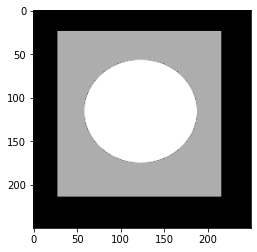

In [3]:
plt.imshow(crop_img_a, cmap='gray')

In [4]:
def binarize(image, threshold=.5):
    copy = np.copy(image)
    
    copy[image >= threshold] = 1
    copy[image < threshold] = 0
    
    return copy

def get_marching_segmentation(case):
    if case == 0:
        return np.array([[0,0,0],
                         [0,0,0],
                         [0,0,0]])
    elif case == 1:
        return np.array([[0,0,0],
                         [1,0,0],
                         [0,1,0]])
    elif case == 2:
        return np.array([[0,0,0],
                         [0,0,1],
                         [0,1,0]])
    elif case == 3:
        return np.array([[0,0,0],
                         [1,1,1],
                         [0,0,0]])
    elif case == 4:
        return np.array([[0,1,0],
                         [0,0,1],
                         [0,0,0]])
    elif case == 5:
        return np.array([[0,1,0],
                         [1,0,1],
                         [0,1,0]])
    elif case == 6:
        return np.array([[0,1,0],
                         [0,1,0],
                         [0,1,0]])
    elif case == 7:
        return np.array([[0,1,0],
                         [1,0,0],
                         [0,0,0]])
    elif case == 8:
        return np.array([[0,1,0],
                         [1,0,0],
                         [0,0,0]])
    elif case == 9:
        return np.array([[0,1,0],
                         [0,1,0],
                         [0,1,0]])
    elif case == 10:
        return np.array([[0,1,0],
                         [1,0,1],
                         [0,1,0]])
    elif case ==11:
        return np.array([[0,1,0],
                         [0,0,1],
                         [0,0,0]])
    elif case ==12:
        return np.array([[0,0,0],
                         [1,1,1],
                         [0,0,0]])
    elif case ==13:
        return np.array([[0,0,0],
                         [0,0,1],
                         [0,1,0]])
    elif case ==14:
        return np.array([[0,0,0],
                         [1,0,0],
                         [0,1,0]])
    elif case ==15:
        return np.array([[0,0,0],
                         [0,0,0],
                         [0,0,0]])


def marching_case(portion):
    [[a,b,d,c]] = portion.reshape((1,4))

    return d + c*2 + b*4 + a*8
    
def marchig_square_cases(img):
    h,w = img.shape
    
    cases = []
    for y in range(h-1):
        row = []
        for x in range(w-1):
            row.append(marching_case(img[y:y+2, x:x+2]))
        cases.append(row)
        
    return np.array(cases).astype(np.uint8) 

def marching_square_contour(cases):
    
    return np.vstack(
        [
            np.hstack([get_marching_segmentation(col) for col in row])
            for row in cases]
    )
            

def marching_squares(img, threshold=.5, order=0):
    binarized_img = binarize(img, threshold)
    
    cases = marchig_square_cases(binarized_img)
    
    return marching_square_contour(cases)

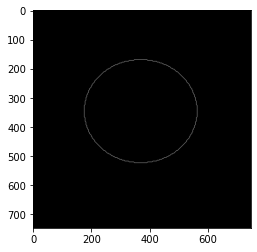

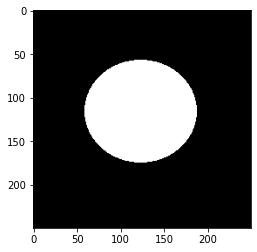

In [5]:
plt.imshow(marching_squares(binarize(crop_img_a, 0.8)), cmap='gray')
plt.show()
plt.imshow(binarize(crop_img_a, 0.8), cmap='gray')
plt.show()